<a href="https://colab.research.google.com/github/rexxar280903/DeepLearning/blob/main/01_Neural_Network_Regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf

In [82]:
tf.__version__

'2.17.0'

In [83]:
import numpy as np
import matplotlib.pyplot as plt


In [84]:
# membuat fitur
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# membuat label
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

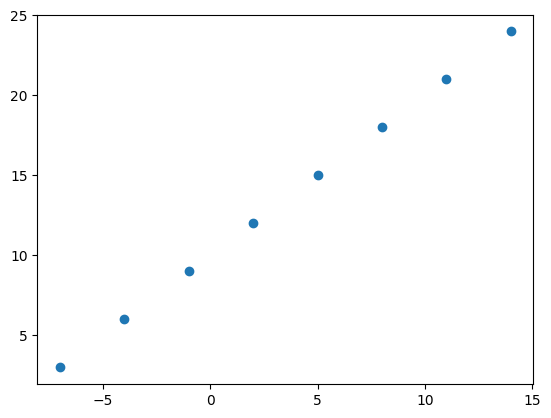

In [85]:
# visualisasi
plt.scatter(x,y)

In [86]:
  y == x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [87]:
# mengubah nparray menjadi tensor
x = tf.constant(x)
x = tf.expand_dims(x, axis=-1)  # Menambahkan dimensi baru pada sumbu terakhir

y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [88]:
x.ndim,y.ndim

(2, 1)

## memodelkan dengan tensor
1. **membuat model** - mendefinisikan input dan output layer, sebagaimana layer tersebunyi di model deep learning

2. **compiling model** - mendefinisikan loss fungsi, (fungsi yang memberitahu model kita apa yang salah), dan optimizer, (memberitahu model bagaimana meningkatkan pola pembelajaran) dan mengevaluasi matriks.

3. **fitting model** - membiarkan model mencoba untuk menemukan pola diantara fitur dan label



In [89]:
# set random seed
tf.random.set_seed(42)

# membuat model menggunakan sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), #stochastic gradient descent
    metrics=["mae"]
)



In [90]:
# 3. fit model
model.fit(x,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - loss: 9.4661 - mae: 9.4661
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.3336 - mae: 9.3336
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.2011 - mae: 9.2011
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.0686 - mae: 9.0686
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.9361 - mae: 8.9361
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.8036 - mae: 8.8036
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.6711 - mae: 8.6711
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.5386 - mae: 8.5386
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.4061 - mae: 8.4061
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.2736 - mae: 8.2736
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.1411 - mae: 8.1411
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.0086 - mae: 8.0086
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/st

In [91]:
x,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [92]:
# prediksi menggunakan model yang sdh dilatih
import numpy as np
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[29.903057]], dtype=float32)

In [93]:
x, model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 array([[-11.197731  ],
        [ -6.060132  ],
        [ -0.92253345],
        [  4.215065  ],
        [  9.352663  ],
        [ 14.490262  ],
        [ 19.627861  ],
        [ 24.76546   ]], dtype=float32))

## meningkatkan model


In [94]:
#membuat model baru dengan layer tambahan
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)


In [95]:

model.fit(x,y,epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.5370 - mae: 13.5370
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.1381 - mae: 13.1381
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.7674 - mae: 12.7674
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.4129 - mae: 12.4129
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.0703 - mae: 12.0703
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.7414 - mae: 11.7414
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.4232 - mae: 11.4232
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.1944 - mae: 11.1944
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.9558 - mae: 10.9558
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.7140 - mae: 10.7140
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 10.4668 - mae: 10.4668
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.2026 - mae: 10.2026
Epoch 13/300
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 array([[ 3.0027363],
        [ 5.960623 ],
        [ 8.956811 ],
        [11.941005 ],
        [14.859232 ],
        [17.783787 ],
        [20.769377 ],
        [23.779057 ]], dtype=float32))

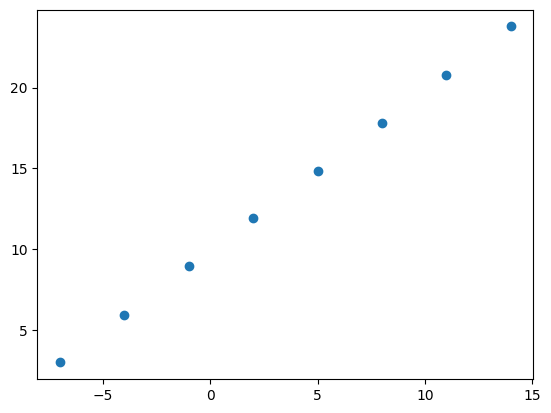

In [96]:
x,y,plt.scatter(x,model.predict(x)),model.predict(x)

In [97]:
x,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [98]:
model.predict(np.array([[19.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[29.207102]], dtype=float32)

In [99]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [100]:
x = tf.range(-100,100,4)
x = tf.expand_dims(x,axis=1)
y = x + 10
x,y

(<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56],
        [  60],
        [  64],
        [  68],
        [  72],
        [  76],
        [  80],
        [  84],
        [  88],
        [  92],
        [  96]], dtype=int32)>,
 <tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70]

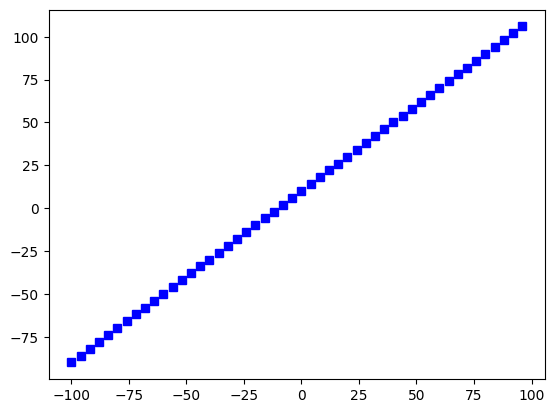

In [101]:
plt.plot(x,y,'bs')

In [102]:
# model 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['mae']
)

In [103]:
model.fit(x,y,epochs=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.7441 - mae: 108.7441  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.6431 - mae: 108.6431  
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.5423 - mae: 108.5423 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.4415 - mae: 108.4415 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.3407 - mae: 108.3407  


In [104]:
mp = model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


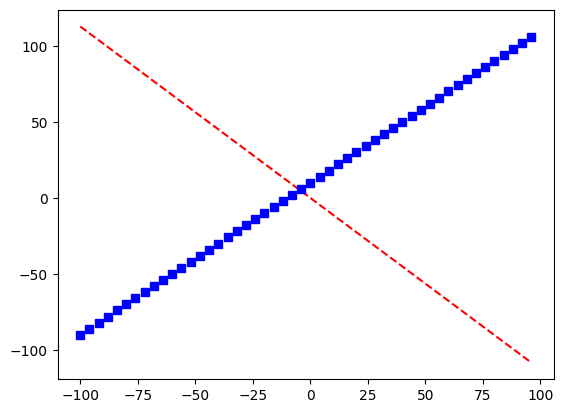

In [105]:
plt.plot(x,mp,'r--',x,y,'bs')

In [106]:
# model 1 epoch 100
model.fit(x,y,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.2399 - mae: 108.2399
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.1391 - mae: 108.1391  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.0383 - mae: 108.0383  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.9374 - mae: 107.9374 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.8366 - mae: 107.8366  
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.7358 - mae: 107.7358  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.6350 - mae: 107.6350  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.5341 - mae: 107.5341 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.4333 - mae: 107.4333 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.3324 - mae: 107.3324  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.2316 - mae: 107.2316  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.1307 - mae: 107.1

In [107]:
m1_e100 = model.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


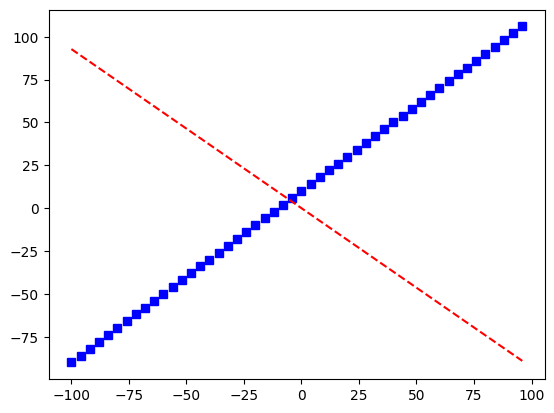

In [108]:
plt.plot(x,y,'bs',x,m1_e100,'r--')

In [109]:
# model 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [110]:
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['mae']
)

In [111]:
x,y

(<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56],
        [  60],
        [  64],
        [  68],
        [  72],
        [  76],
        [  80],
        [  84],
        [  88],
        [  92],
        [  96]], dtype=int32)>,
 <tf.Tensor: shape=(50, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70]

In [112]:
model2.fit(x,y,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 51.4029 - mae: 51.4029
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.9810 - mae: 46.9810  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.7629 - mae: 42.7629  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.7590 - mae: 38.7590  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.9347 - mae: 34.9347  
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.9078 - mae: 30.9078
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.5316 - mae: 26.5316  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6970 - mae: 21.6970
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.3867 - mae: 16.3867  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5547 - mae: 10.5547 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4196 - mae: 5.4196
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.7082 - mae: 6.7082  
Epoch 13/100
2/2 ━━━━━━━━━

In [113]:
m2 = model2.predict(x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


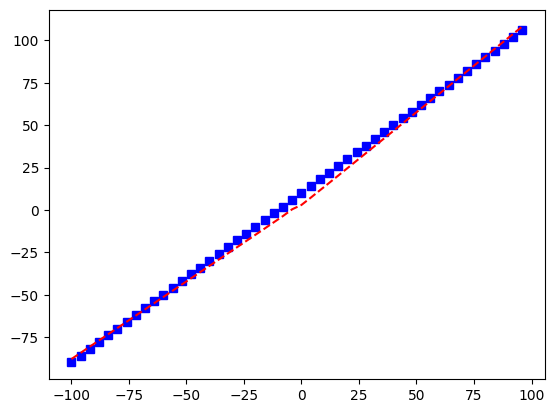

In [114]:
plt.plot(x,y,'bs', x,m2,'r--')

In [115]:
x_train=x[:40] #mengambil dari indeks 0-39
x_test = x[40:] #mengambil dari indek 40 sampai akhir


y_train = y[:40]
y_test = y[40:]
len(x_train), len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

[]

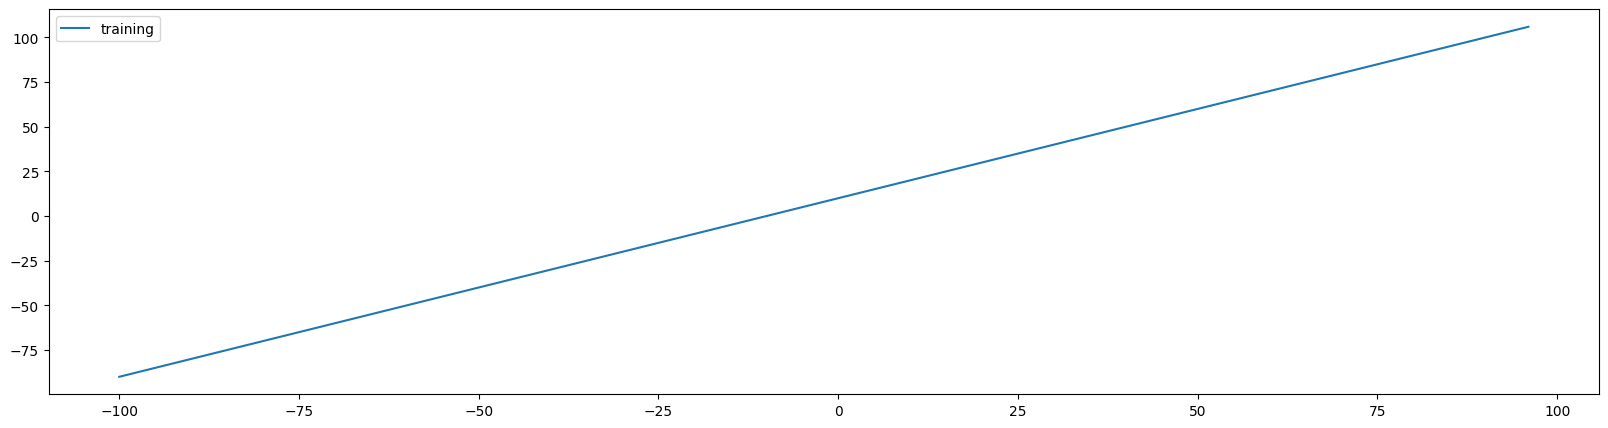

In [116]:
#visualisasi data
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(x,y, label='training')
ax.legend()
ax.set()

In [117]:
# membuat model dengan 1 layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics =['mae']
)

In [118]:
#train model dengan x_test
model.fit(x_test,y_test,epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 92.7092 - mae: 92.7092
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.8592 - mae: 31.8592
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.9908 - mae: 28.9908
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.8592 - mae: 31.8592
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.9908 - mae: 28.9908
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.8592 - mae: 31.8592
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.9908 - mae: 28.9908
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.8592 - mae: 31.8592
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.9908 - mae: 28.9908
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.8592 - mae: 31.8592
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.9908 - mae: 28.9908
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.8592 - mae: 31.8592
Epoch 13/500
1/1 ━━━━━━━

In [119]:
predict = model.predict(x)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[]

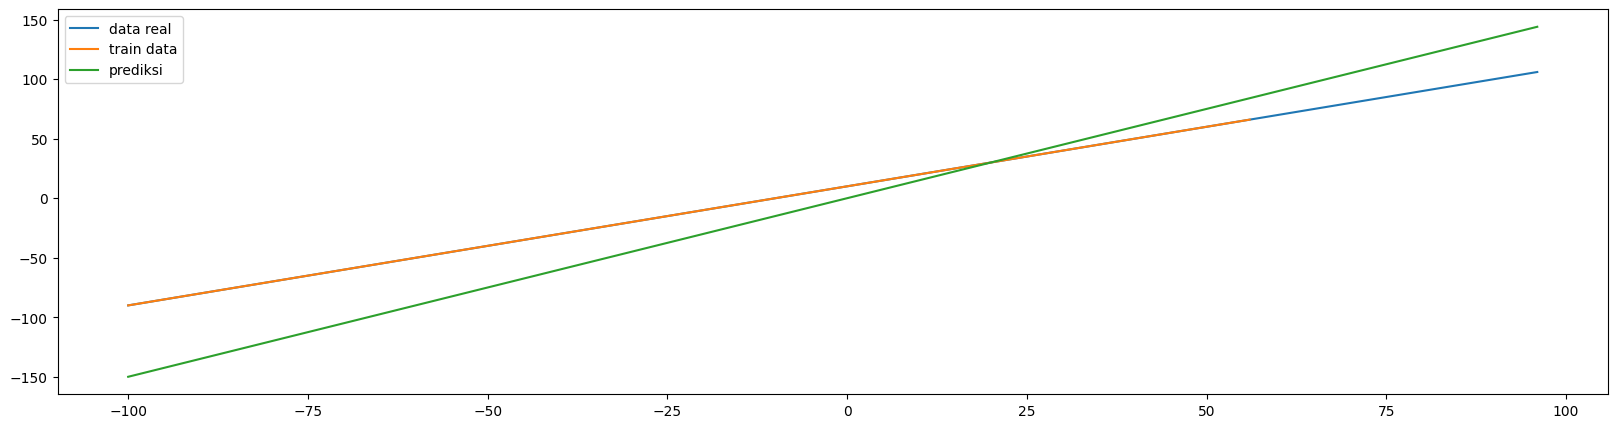

In [120]:
fig,ax = plt.subplots(figsize=(20,5))

ax.plot(x,y,label='data real')
ax.plot(x_train,y_train,label='train data')
ax.plot(x,predict,label='prediksi')
ax.legend()
ax.set()

In [121]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [122]:
# latihan model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

/home/kanza-laptop/Documents/belajar/python/lat/lat1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


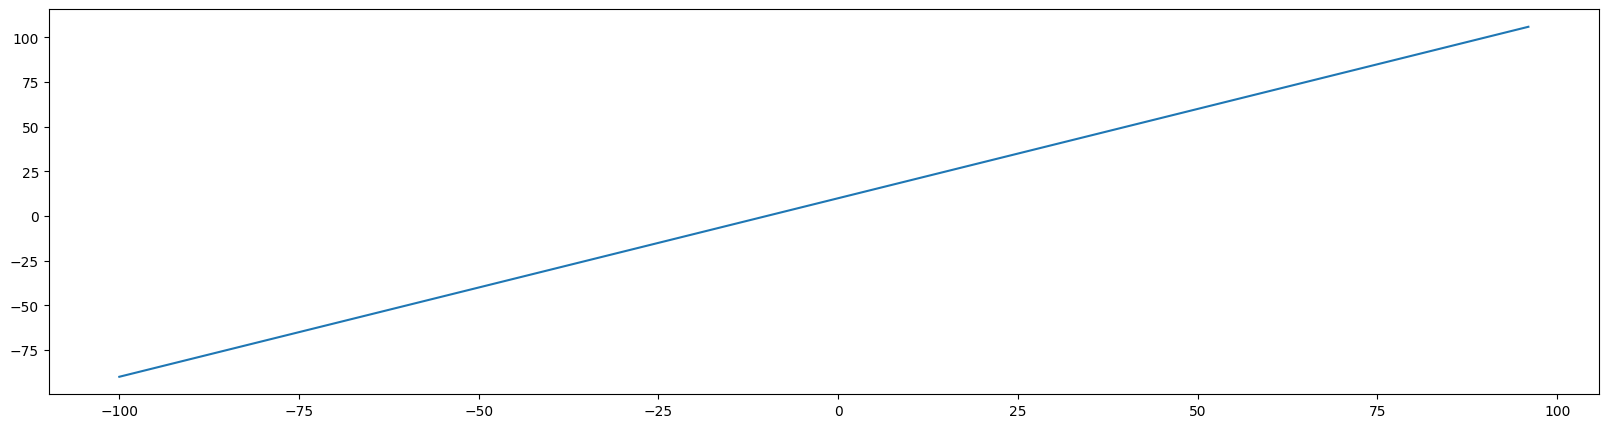

In [123]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(x,y)

In [124]:
model.fit(x,y,epochs=300)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 128.5582 - mae: 128.5582 
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.9069 - mae: 78.9069 
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.6441 - mae: 30.6441  
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9473 - mae: 9.9473  
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9076 - mae: 9.9076  
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8327 - mae: 10.8327
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8432 - mae: 9.8432  
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5105 - mae: 11.5105  
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4552 - mae: 11.4552  
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.1329 - mae: 11.1329 
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3278 - mae: 10.3278
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9214 - mae: 9.9214  
Epoch 13/300
2/2 ━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


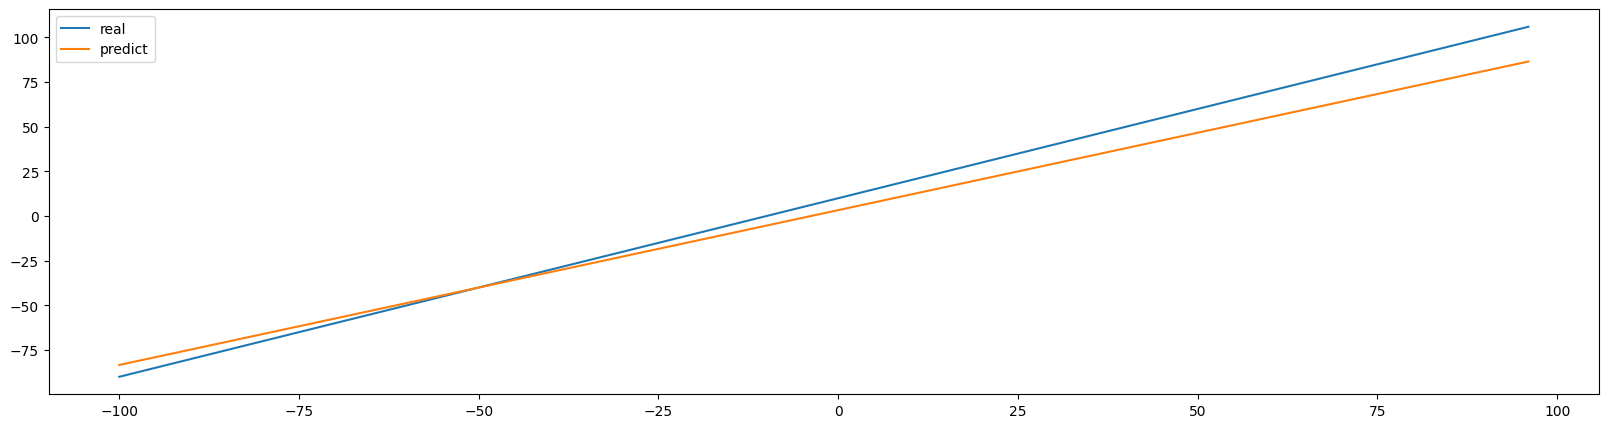

In [125]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(x,y,label='real')
ax.plot(x,model.predict(x),label='predict')
ax.legend()

In [126]:
#model dengan 1 layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)


In [127]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [128]:
model.fit(x,y,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.9902 - mae: 49.99026
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8930 - mae: 9.8930 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4448 - mae: 9.4448  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8271 - mae: 10.82718
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9780 - mae: 11.9780 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.7390 - mae: 14.7390  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8796 - mae: 9.8796 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3891 - mae: 10.3891  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3548 - mae: 11.3548 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.2498 - mae: 14.2498 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.2014 - mae: 9.2014 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3344 - mae: 6.3344 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


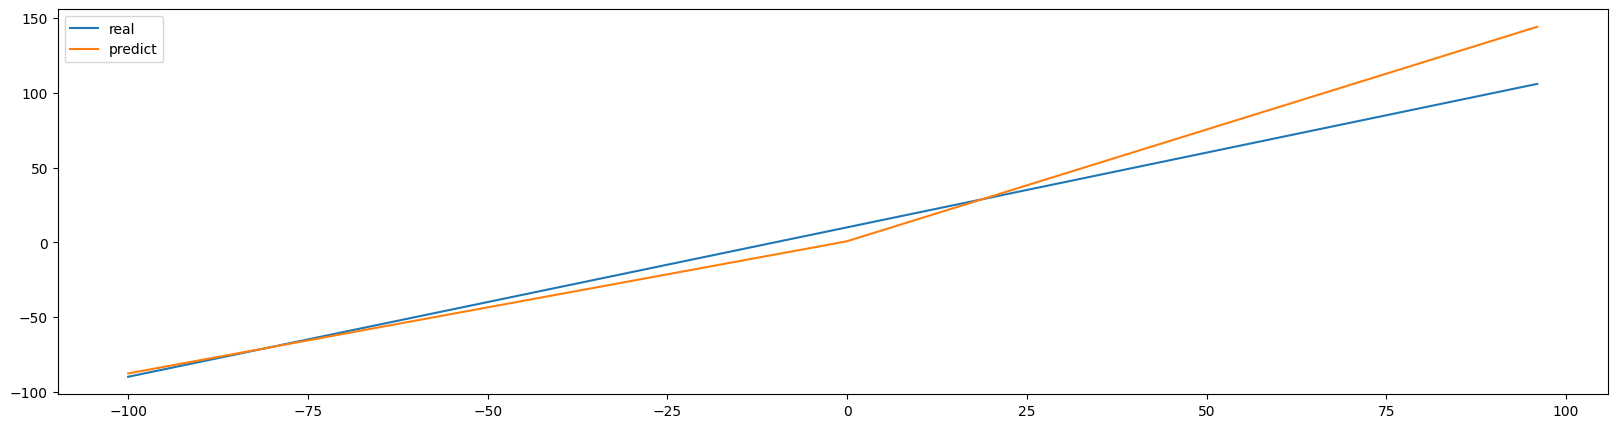

In [129]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(x,y,label='real')
ax.plot(x,model.predict(x),label='predict')
ax.legend()

In [130]:
#model dengan 1 layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu',name='dense1'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,name='input_layer')
],name='model1')

model.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['mae']
)
model.fit(x,y,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 48.8507 - mae: 48.8507  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.3921 - mae: 44.3921  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.1027 - mae: 40.1027  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.9150 - mae: 35.9150  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.9511 - mae: 31.9511
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.1013 - mae: 28.1013 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.3278 - mae: 24.3278  
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.7501 - mae: 20.7501  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.1008 - mae: 18.1008  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3943 - mae: 17.3943
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.4917 - mae: 16.4917
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5752 - mae: 14.5752  
Epoch 13/100
2/2 ━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


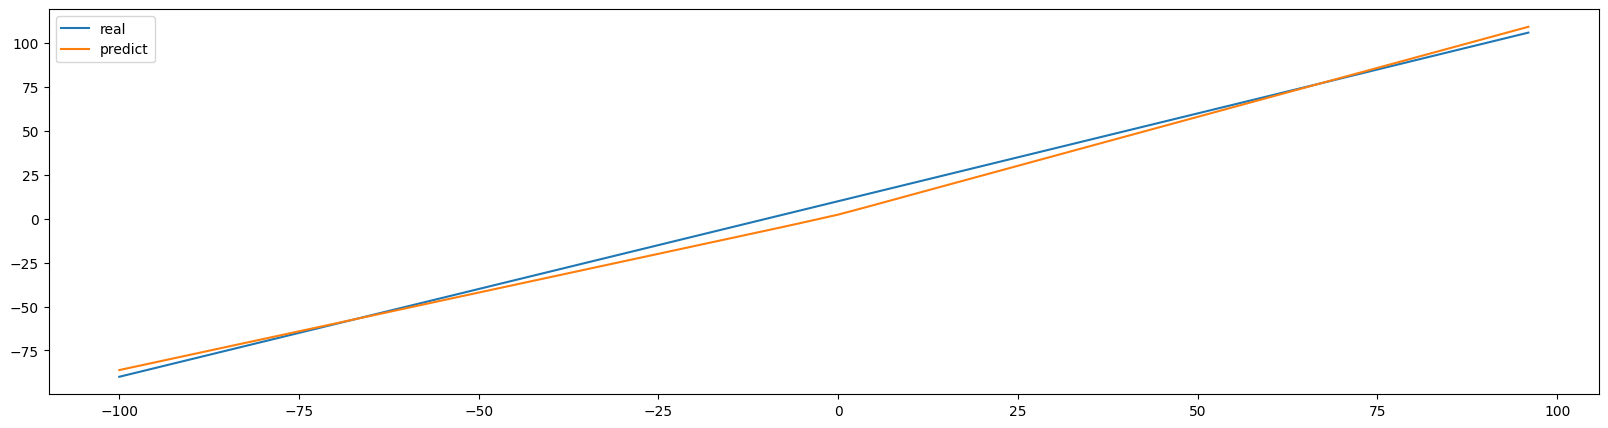

In [131]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(x,y,label='real')
ax.plot(x,model.predict(x),label='predict')
ax.legend()

In [132]:
model.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer (Dense)             │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

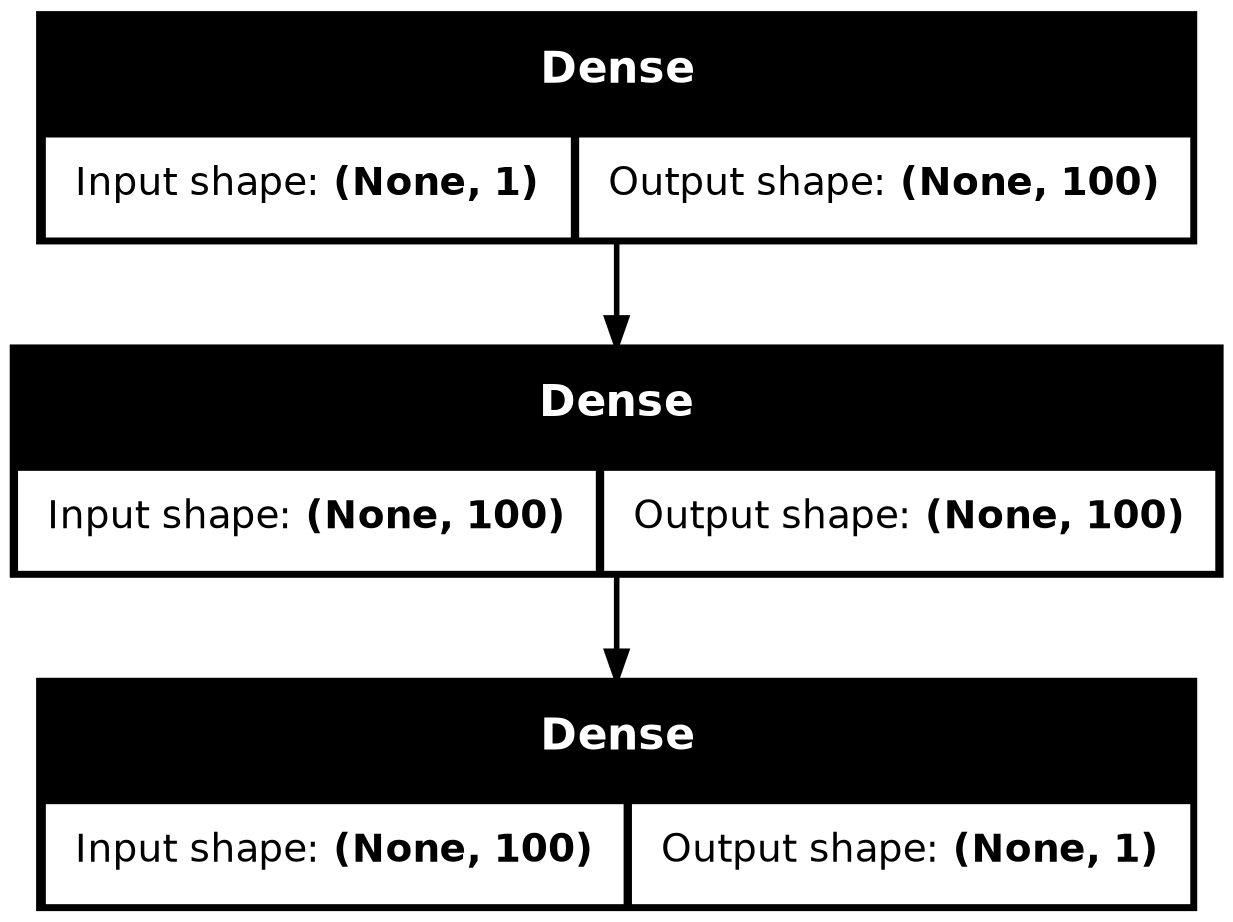

In [133]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [134]:
x_train=x[:40] #mengambil dari indeks 0-39
x_test = x[40:] #mengambil dari indek 40 sampai akhir


y_train = y[:40]
y_test = y[40:]
len(x_train), len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [135]:
y_test,

(<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>,)

In [136]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


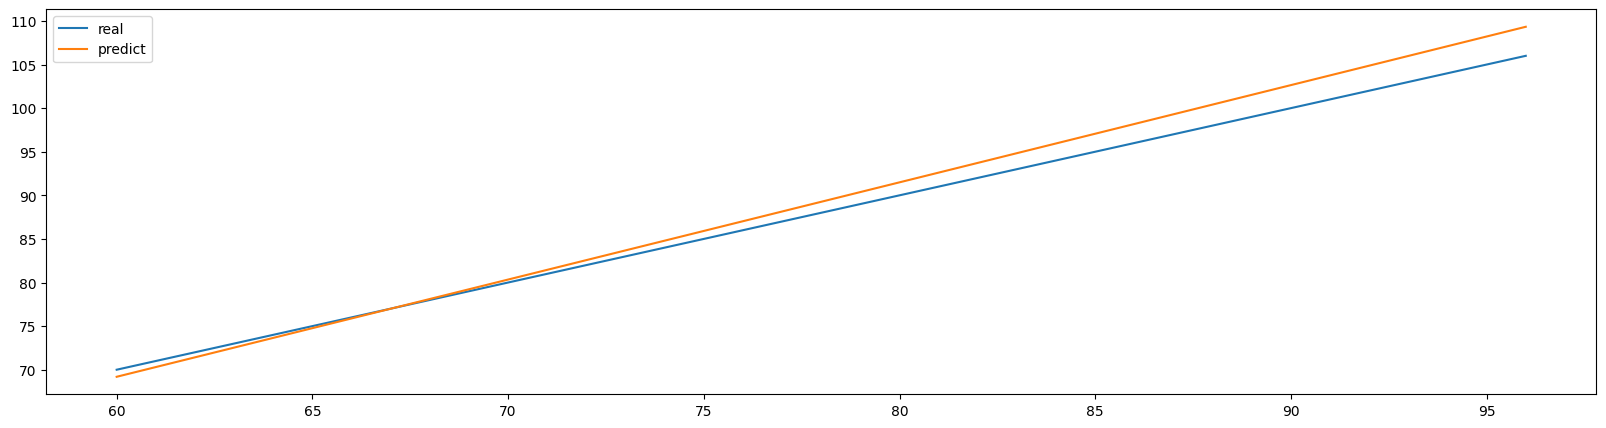

In [137]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(x_test,y_test,label='real')
ax.plot(x_test,y_pred,label='predict')
ax.legend()

In [138]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

In [139]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.4925 - mae: 1.4925


[1.4924598932266235, 1.4924598932266235]

In [140]:
y_pred

array([[ 69.1898  ],
       [ 73.64993 ],
       [ 78.11007 ],
       [ 82.5702  ],
       [ 87.03034 ],
       [ 91.49047 ],
       [ 95.950615],
       [100.41074 ],
       [104.87088 ],
       [109.33101 ]], dtype=float32)

In [141]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.1898  ,  73.64993 ,  78.11007 ,  82.5702  ,  87.03034 ,
        91.49047 ,  95.950615, 100.41074 , 104.87088 , 109.33101 ],
      dtype=float32)>

In [142]:
mae = tf.metrics.mae(
    y_true=tf.squeeze(y_test),
    y_pred=tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.4924599>

In [143]:
mae = tf.metrics.mae(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.81020355, 0.35006714, 0.11006927, 0.57019806, 1.0303421 ,
       1.4904709 , 1.9506149 , 2.4107437 , 2.8708801 , 3.331009  ],
      dtype=float32)>

In [144]:
mse = tf.metrics.mse(
    y_true=tf.squeeze(y_test),
    y_pred=tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.3353486>

In [145]:
#membuat fungsi
def mae (y_true,y_pred):
    return tf.metrics.mae(y_true=y_true,y_pred=y_pred)

def mse (y_true,y_pred):
    return tf.metrics.mse(y_true=y_true,y_pred=y_pred)

## Dataset

In [152]:
x_train, y_train

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 <tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-90],
        [-86],
        [-82],
        [-78],
        [-74],
        [-70],
        [-66],
        [-62],
        [-58],
        [-54],
        [-50],
        [-46],
        [-42],
        [-38],
        [-34],
        [-30],
        

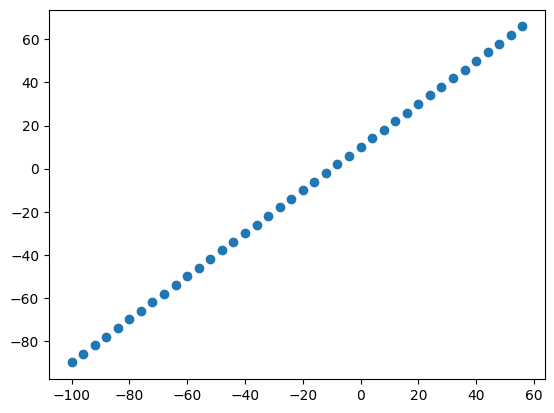

In [151]:
plt.scatter(x_train,y_train)

## meningkatkan model

1. menambahkan dataset - agar model bisa belajar lebih banyak contoh
2. membuat model lebih besar - dengan menambahkan layer yang lebih kompleks atau unit tersebunyi di setiap layer
3. melatih lebih banyak, memberikan model lebih banyak kesempatan untuk menemukan model 

# latihan model 
1. model1 - 1 layer, => 100 epochs
2. model2 - 2 layer,=> 100 epochs
3. model3 - 2 layer => 500 epochs

In [163]:
#model 1 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_1.fit(x_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 107.8260 - mae: 107.8260
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72.6578 - mae: 72.6578
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.6372 - mae: 37.6372
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3812 - mae: 8.3812
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0976 - mae: 9.0976
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0713 - mae: 8.0713 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7969 - mae: 9.7969
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1794 - mae: 8.1794 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7231 - mae: 8.7231
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5898 - mae: 8.5898
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3576 - mae: 8.3576
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1008 - mae: 9.1008 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [167]:
def plot_predictions(predictions):
    fig,ax = plt.subplots(figsize=(20,5))

    ax.plot(x_train,y_train, label='train')
    ax.plot(x_test,y_test, label='test')
    ax.plot(x_test,predictions,label='predictions')
    ax.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


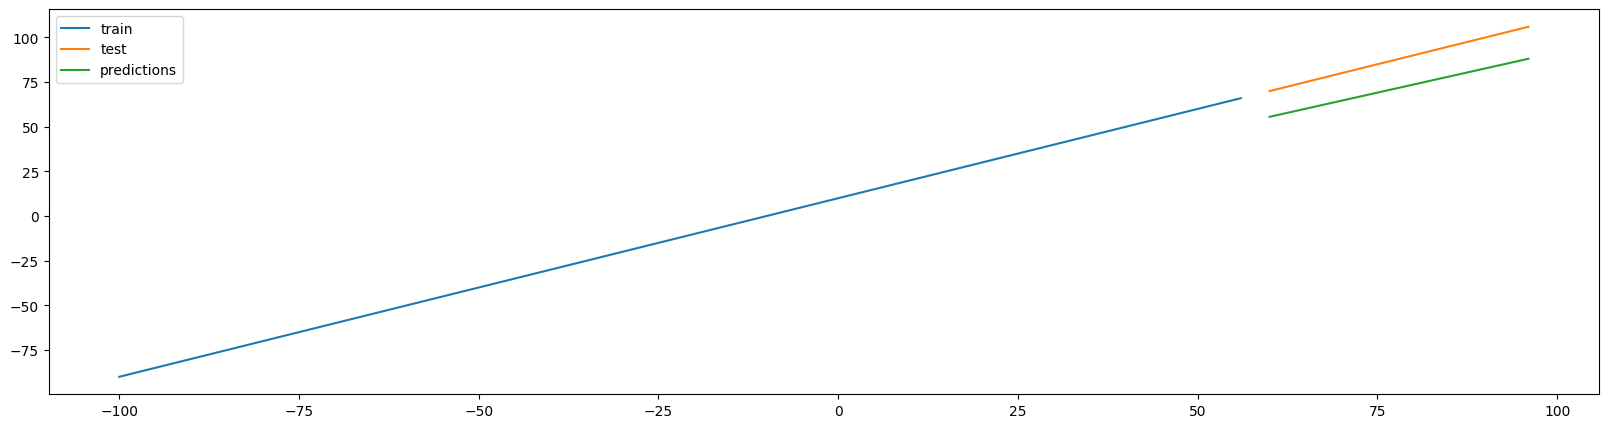

In [170]:
y_pred1 = model_1.predict(x_test)
plot_predictions(y_pred1)

In [171]:
y_test,y_pred1

(<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32)>,
 array([[55.57228 ],
        [59.185642],
        [62.799004],
        [66.41236 ],
        [70.02572 ],
        [73.639084],
        [77.25244 ],
        [80.8658  ],
        [84.479164],
        [88.09252 ]], dtype=float32))

In [176]:
# calculate model, evaluations
mae1 = mae(tf.squeeze(y_test),tf.squeeze(y_pred1))
mse1 = mse(tf.squeeze(y_test),tf.squeeze(y_pred1))
mae1,mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=16.167599>,
 <tf.Tensor: shape=(), dtype=float32, numpy=262.62454>)

In [245]:
# model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model2.fit(x_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2467 - mae: 0.2467 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6327 - mae: 0.6327
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5517 - mae: 0.5517  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4826 - mae: 0.4826  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5433 - mae: 0.5433
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2035 - mae: 0.2035  
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5731 - mae: 0.5731
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3897 - mae: 0.3897  
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4610 - mae: 0.4610  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4671 - mae: 0.4671
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5523 - mae: 0.5523
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1182 - mae: 0.1182
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [247]:
model_2.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (10, 100)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (10, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


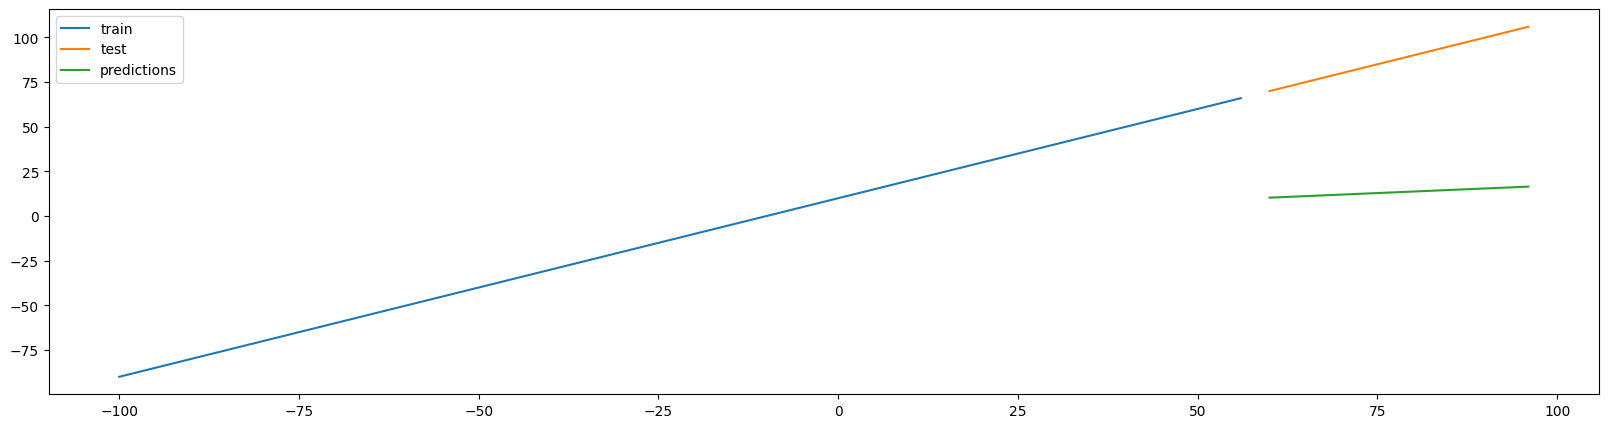

In [248]:
y_pred2 = model_2.predict(x_test)
plot_predictions(y_pred2)

In [233]:
mae2 = mae(tf.squeeze(y_test), tf.squeeze(y_pred2))
mse2 = mse(tf.squeeze(y_test), tf.squeeze(y_pred2))
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.4924599>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.3353486>)

In [203]:
#model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model_3.fit(x_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1090 - mae: 8.10906
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.1342 - mae: 29.1342  
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.3233 - mae: 25.3233
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.0073 - mae: 20.0073  
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.7448 - mae: 17.7448  
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.7396 - mae: 16.7396  
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3923 - mae: 16.3923  
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9856 - mae: 11.9856  
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9053 - mae: 14.9053  
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8216 - mae: 15.8216 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9480 - mae: 11.9480  
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.9591 - mae: 14.9591  
Epoch 13/500
2/2 ━━

In [222]:
model_3.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


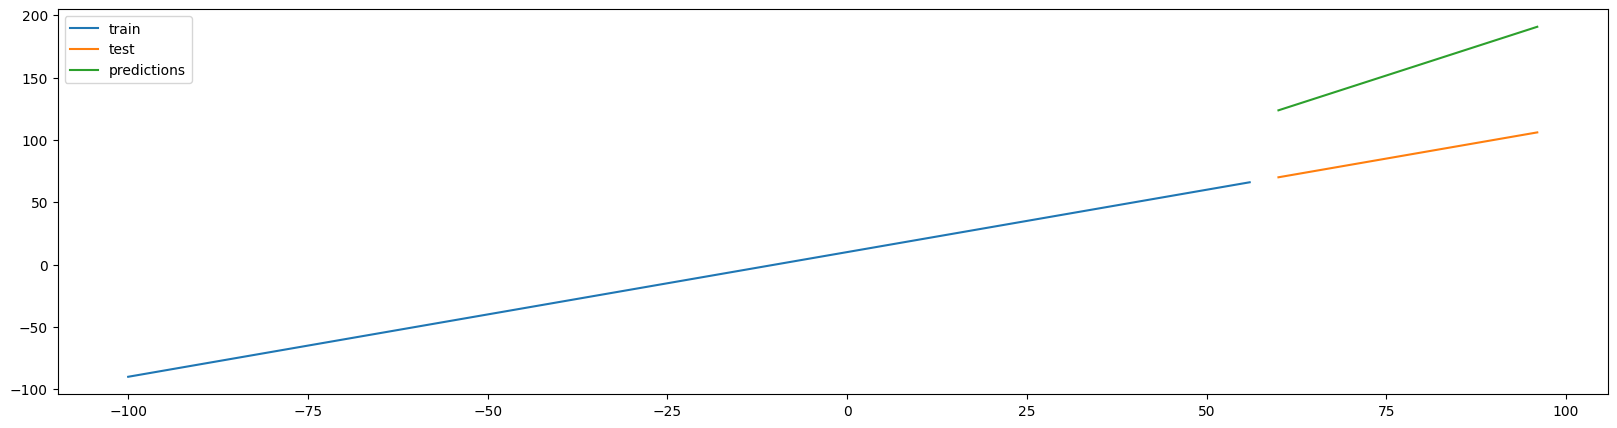

In [204]:
y_pred3 = model3.predict(x_test)
plot_predictions(y_pred3)

In [205]:
mae3 = mae(tf.squeeze(y_test),tf.squeeze(y_pred3))
mse3 = mse(tf.squeeze(y_test), tf.squeeze(y_pred3))
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=69.20979>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4887.8936>)

In [206]:
# membandingkan hasil experiments
import pandas as pd

model_result = [
    ['model_1', mae1.numpy(),mse1.numpy()],
    ['model_2', mae2.numpy(),mse2.numpy()],
    ['model_3', mae3.numpy(), mse3.numpy()]
    ]

model_result

[['model_1', 16.167599, 262.62454],
 ['model_2', 1.4924599, 3.3353486],
 ['model_3', 69.20979, 4887.8936]]

In [207]:
all_result = pd.DataFrame(model_result, columns=['model', 'm/home/kanza-laptop/Documents/belajar/python/lat/DeepLearning/best_model_HDF5.h5ae', 'mse'])
all_result

,model,mae,mse
0,model_1,16.167599,262.624542
1,model_2,1.492460,3.335349
2,model_3,69.209793,4887.893555


In [211]:
model_2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# menyimpan model
setelah membuat model2 kita bisa menyiman model yang telah kita buat untuk kita gunakan lagi 

ada 2 jenis format penyimpanan model yaitu:
1. saved model
2. HDF5


In [249]:
model_2.save("best_model_savedmodel.keras")

In [250]:
model_2.save("best_model_HDF5.h5")

In [251]:
load_savedmodel = tf.keras.models.load_model("/home/kanza-laptop/Documents/belajar/python/lat/DeepLearning/best_model_savedmodel.keras")
load_savedmodel.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (10, 100)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (10, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [252]:
load_HDF5 = tf.keras.models.load_model("/home/kanza-laptop/Documents/belajar/python/lat/DeepLearning/best_model_HDF5.h5")

In [253]:
load_HDF5.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (10, 100)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (10, 1)                │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [254]:
#membandingkan model2 dengan savedmodel2
model_2_preds = model_2.predict(x_test)
load_savedmodel_pred = load_savedmodel.predict(x_test) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [259]:
model_2_preds == load_savedmodel_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

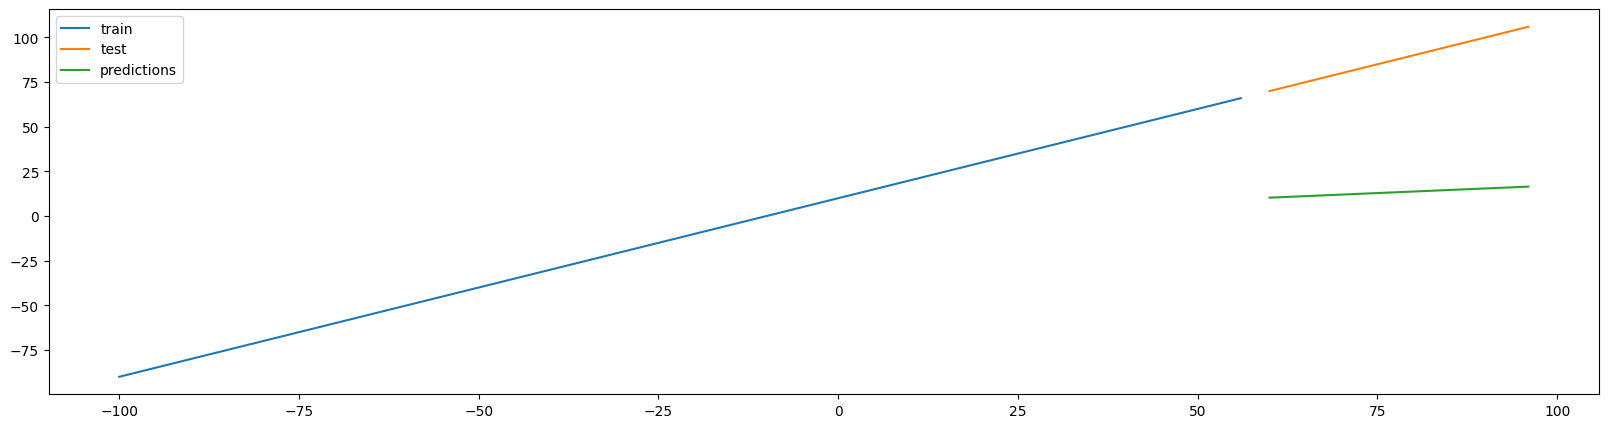

In [255]:
plot_predictions(model_2_preds)

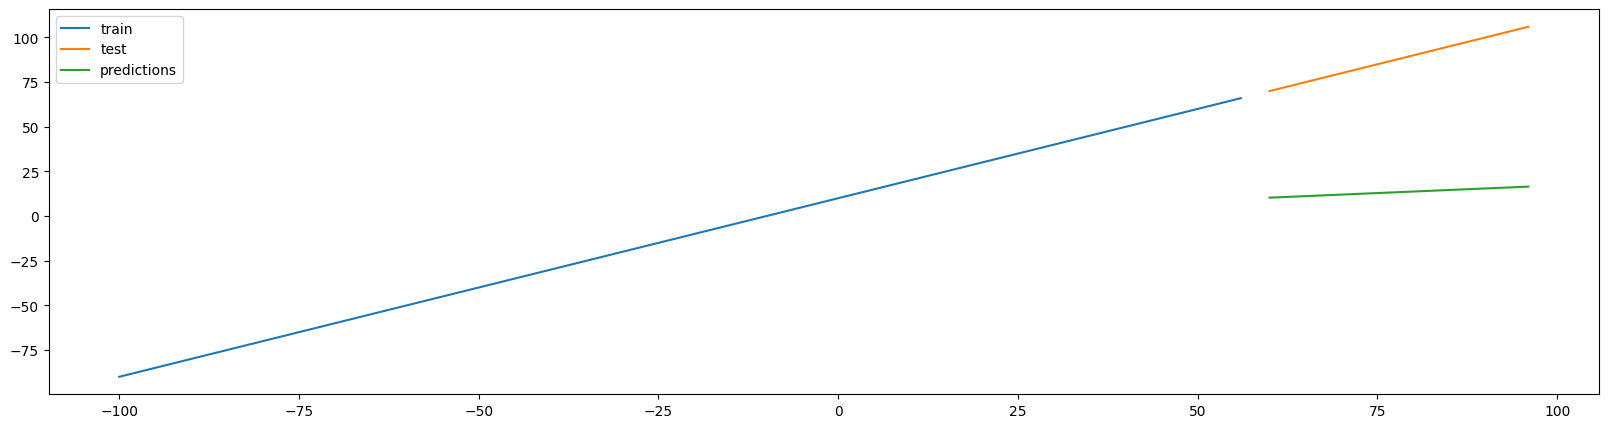

In [256]:
plot_predictions(load_savedmodel_pred)

# Dataset besar

In [2]:
import tensorflow as tf
import pandas as pd

2024-11-10 16:10:15.954428: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 16:10:16.074045: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 16:10:16.197809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 16:10:16.308906: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 16:10:16.340022: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 16:10:16.527438: I tensorflow/core/platform/cpu_feature_gu

In [3]:
df = pd.read_csv(r"../dataset/insurance.csv", encoding="utf-8")
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_onehot = pd.get_dummies(df)
insurance_onehot.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [5]:
# memisahkan fitur dan label
x = insurance_onehot.drop('charges',axis=1)
y = insurance_onehot['charges']
x,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0        True     False      False        True   
 1      18  33.770         1       False      True       True       False   
 2      28  33.000         3       False      True       True       False   
 3      33  22.705         0       False      True       True       False   
 4      32  28.880         0       False      True       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3       False      True       True       False   
 1334   18  31.920         0        True     False       True       False   
 1335   18  36.850         0        True     False       True       False   
 1336   21  25.800         0        True     False       True       False   
 1337   61  29.070         0        True     False      False        True   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [6]:
# membuat train dan test data set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [7]:
len(x), len(x_train)

(1338, 1070)

In [8]:
# membuat model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)


In [60]:
history_model_1= insurance_model.fit(x_train,y_train, epochs=100,verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6297.4390 - mae: 6297.4390
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6739.0586 - mae: 6739.0586
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7021.7725 - mae: 7021.7725
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6115.5601 - mae: 6115.5601
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6535.6050 - mae: 6535.6050
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6410.7354 - mae: 6410.7354
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7044.9419 - mae: 7044.9419
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6778.7881 - mae: 6778.7881
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7163.5020 - mae: 7163.5020
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6675.1934 - mae: 6675.1934
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7143.1187 - mae: 7143.1187
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [11]:
#evaluasi model 
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7447.7207 - mae: 7447.7207


[7202.01953125, 7202.01953125]

Text(0.5, 0, 'epochs')

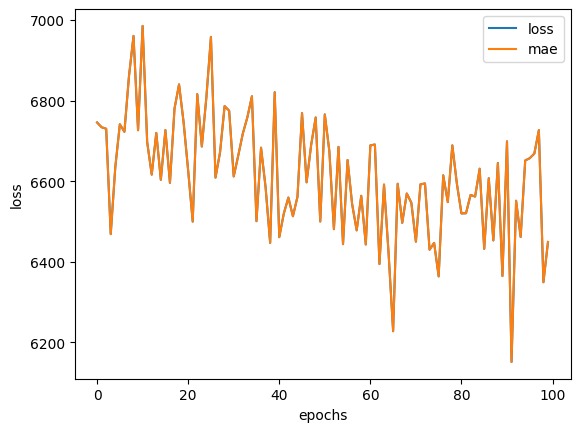

In [61]:
pd.DataFrame(history_model_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


In [12]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## eksperiment - diluar course

In [30]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(1)
])

model1.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model1.fit(x_test,y_test, epochs=500)

Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12364.0273 - mae: 12364.0273 
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7332.7578 - mae: 7332.7578
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7177.8823 - mae: 7177.8823
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7442.6689 - mae: 7442.6689
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7192.6313 - mae: 7192.6313
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7578.6216 - mae: 7578.6216
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7266.8296 - mae: 7266.8296
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7983.2065 - mae: 7983.2065 
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7341.5356 - mae: 7341.5356
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7711.4780 - mae: 7711.4780
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7623.2568 - mae: 7623.2568
Epoch 12/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7776.5903 - 

In [31]:
model1.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8561.4082 - mae: 8561.4082 


[8286.8720703125, 8286.8720703125]

In [29]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.26 KB)

 Trainable params: 1,301 (5.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,604 (10.18 KB)

In [36]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

model2.fit(x_train,y_train,epochs=100)

Epoch 1/100


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - mae: nan                
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan
Epoch 14/100
34/34 ━━━━━━━━━━

In [34]:
model2.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan 


[nan, nan]

In [33]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,503 (84.00 KB)

 Trainable params: 21,501 (83.99 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## lanjut course

In [55]:
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history_model_2= insurance_model_2.fit(x_train,y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13275.5791 - mae: 13275.5791
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13159.4678 - mae: 13159.4678
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12883.3730 - mae: 12883.3730
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12320.9082 - mae: 12320.9082
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11314.5811 - mae: 11314.5811
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9904.5391 - mae: 9904.5391  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8458.2539 - mae: 8458.2539
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7591.9980 - mae: 7591.9980
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7400.7554 - mae: 7400.7554
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7370.6689 - mae: 7370.6689
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7349.1279 - mae: 7349.1279
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [46]:
insurance_model_2.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4760.3320 - mae: 4760.3320 


[4631.5283203125, 4631.5283203125]

Text(0.5, 0, 'epochs')

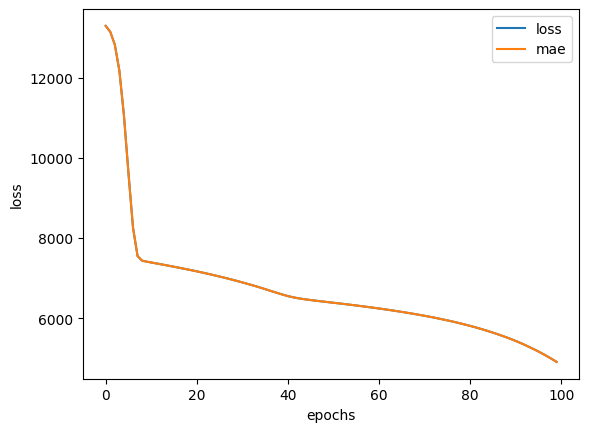

In [58]:
pd.DataFrame(history_model_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


In [51]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history_model_3 = insurance_model_3.fit(x_train,y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13247.5420 - mae: 13247.5420
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13091.9287 - mae: 13091.9287
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12790.7715 - mae: 12790.7715
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12194.9297 - mae: 12194.9297
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11189.4336 - mae: 11189.4336
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9812.8369 - mae: 9812.8369  
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8370.5654 - mae: 8370.5654
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7561.2500 - mae: 7561.2500
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7415.5420 - mae: 7415.5420
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7398.9155 - mae: 7398.9155
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7366.0522 - mae: 7366.0522
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [50]:
insurance_model_3.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3467.2578 - mae: 3467.2578  


[3401.673095703125, 3401.673095703125]

Text(0.5, 0, 'epochs')

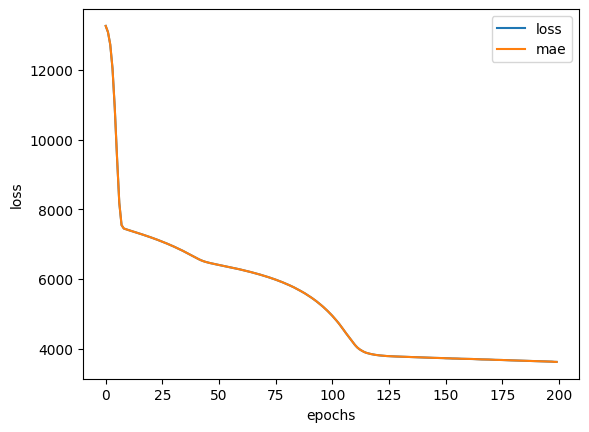

In [53]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## standarisasi & normalisasi

In [71]:
insurance = pd.read_csv('../dataset/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [88]:
insurance.shape

(1338, 7)

In [78]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# membuat tranformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex', 'smoker','region'])
)
ct 

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [81]:
# membuat x dan y kemudian memisahkannya menjadi data train dan test
x = insurance.drop('charges', axis=1)
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# fit column transformer ke training data
ct.fit(x_train)

#mengubah training dan test data dengan normalisasi (minmaxscaler) dan one hot encoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [84]:
x_train.loc[0] #sebelum transform

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [86]:
x_train_normal[0]  # sesudah transform

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [89]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [100]:
# membuat model 
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile model 

insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

insurance_model_4.fit(x_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13296.8906 - mae: 13296.8906
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13288.8623 - mae: 13288.8623
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13269.0225 - mae: 13269.0225
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13226.7461 - mae: 13226.7461
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13150.8330 - mae: 13150.8330
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13030.5410 - mae: 13030.5410
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12855.6660 - mae: 12855.6660
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12616.2227 - mae: 12616.2227
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12302.4648 - mae: 12302.4648
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11908.3535 - mae: 11908.3535
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11441.6904 - mae: 11441.6904
Epoch 12/100
34/34 ━━━━━━━━━━━

Text(0.5, 0, 'epochs')

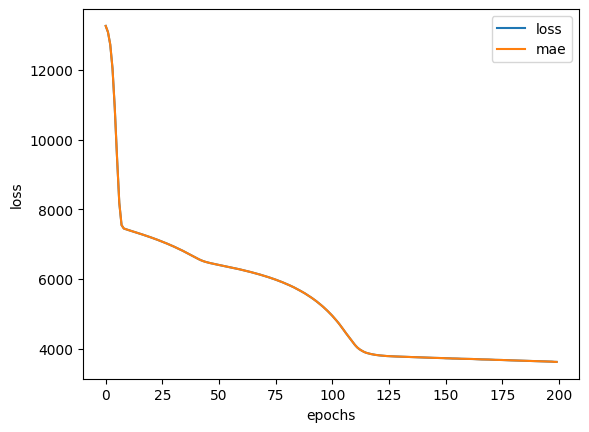

In [98]:
pd.DataFrame(history_model_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [99]:

insurance_model_4.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3213.1606 - mae: 3213.1606 


[3160.660888671875, 3160.660888671875]

insurance_model_2.evaluate(x_test_, y_test) epochs=100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4760.3320 - mae: 4760.3320 


insurance_model_4.evaluate(x_test_normal, y_test) epochs=100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3213.1606 - mae: 3213.1606 

bisa dilihat hasil dari data test yang telah di standarisasi dan yang belum di standarisasi 
dengan melakukan 100 kali epoch hasil yang didapat dapat berbeda secara siginifikan 

namun setelah dilakukan epochs 200 kali hasil yang didapat tidak berbeda jauh namun tetap dengan hasil dengan data yang di normalisasi itu menghasilkan model yang lebih baik